<a href="https://colab.research.google.com/github/kaonmir/I-want-to-study-Data-Science/blob/master/07_Logistic_regression_for_a_binary_classification_with_a_regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from termcolor import colored

In [0]:
data = pd.read_csv("https://raw.githubusercontent.com/kaonmir/MachineLearningAssignment/master/07.%20data.txt?token=AJWECOBQZELQBOIDJ2TK5J26XTE3Q",
                   names=['X0', 'X1', 'label'], header=None, dtype=np.float64)
X0 = data['X0'].to_numpy().reshape(len(data), 1)
X1 = data['X1'].to_numpy().reshape(len(data), 1)
y = data['label'].to_numpy().reshape(len(data), 1)

## 1. Plot the training data

* plot the training data points (x,y) with their labels lll in colors (blue for label 0 and red for label 1)

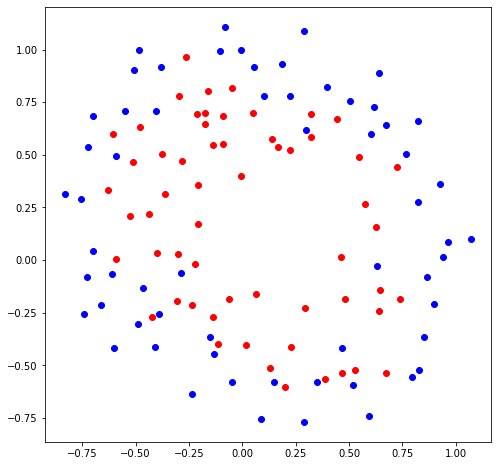

In [4]:
plt.figure(figsize=(8, 8))
plt.scatter(X0[label==0], X1[label==0], c='b')
plt.scatter(X0[label==1], X1[label==1] , c='r')
plt.show()

## 2. Plot the training error with varying regularization parameters

* choose a value for λ<sub>1</sub> in such a way that **over-fitting** is demonstrated and plot the training error J(θ) at every iteration of gradient descent until convergence (in red color)
* choose a value for λ<sub>2</sub> in such a way that **just-right** is demonstrated and plot the training error J(θ) at every iteration of gradient descent until convergence (in green color)
* choose a value for λ<sub>3</sub> in such a way that **under-fitting** is demonstrated and plot the training error J(θ) at every iteration of gradient descent until convergence (in blue color)
* the above three curves should be presented all together in a single figure

### Design a logistic model

In [0]:
def mapFeature(x1,x2,degree):
    out = np.ones(len(x1)).reshape(len(x1),1)
    for i in range(1,degree+1):
        for j in range(i+1):
            terms= (x1**(i-j) * x2**j).reshape(len(x1),1)
            out= np.hstack((out,terms))
    return out
X = mapFeature(X0, X1, 9)

In [0]:
def sigmoid(z):
    return 1/ (1 + np.exp(-z))
def costFunctionReg(theta, X, y ,Lambda):
    m=len(y)
    y=y[:,np.newaxis]
    predictions = sigmoid(X @ theta)
    error = (-y * np.log(predictions)) - ((1-y)*np.log(1-predictions))
    cost = 1/m * sum(error)
    regCost= cost + Lambda/(2*m) * sum(theta**2)
    
    # compute gradient
    j_0= 1/m * (X.T @ (predictions - y))[0]
    j_1 = 1/m * (X.T @ (predictions - y))[1:] + (Lambda/m)* theta[1:]
    grad= np.vstack((j_0[:,np.newaxis],j_1))
    return regCost[0], grad

In [49]:
# Initialize fitting parameters
initial_theta = np.zeros((X.shape[1], 1))
# Set regularization parameter lambda to 1
Lambda = 1
#Compute and display initial cost and gradient for regularized logistic regression
cost, grad=costFunctionReg(initial_theta, X, y, Lambda)
print("Cost at initial theta (zeros):",cost)

Cost at initial theta (zeros): 0.6931471805599461


In [0]:
def gradientDescent(X,y,theta,alpha,num_iters,Lambda):
    m=len(y)
    J_history =[]
    theta_history =[]
    
    for i in range(num_iters):
        cost, grad = costFunctionReg(theta,X,y,Lambda)
        theta = theta - (alpha * grad)
        J_history.append(cost)
        theta_history.append(theta)
    
    return theta , J_history, theta_history

### Derive right answers of question

In [0]:
over_Lambda, right_Lambda, under_Lambda = 0, 0.7, 3
iterations = 1000
alpha = 1

over_theta, over_J_history, over_theta_history = gradientDescent(X,y,initial_theta, alpha, iterations, over_Lambda)
right_theta, right_J_history, right_theta_history= gradientDescent(X,y,initial_theta, alpha, iterations, right_Lambda)
under_theta, under_J_history, under_theta_history = gradientDescent(X,y,initial_theta, alpha, iterations, under_Lambda)

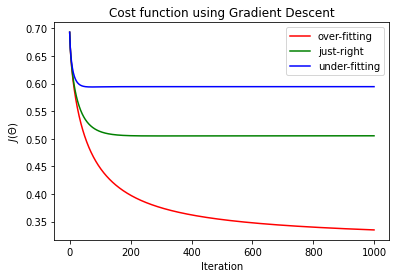

In [167]:
plt.figure()
plt.plot(over_J_history, c='r', label='over-fitting')
plt.plot(right_J_history, c='g', label='just-right')
plt.plot(under_J_history, c='b', label='under-fitting')
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")
plt.legend()

### 3. Display the values of the chosen regularization parameters

* display the value of the chosen λ1 for the demonstration of over-fitting (in red color)
* display the value of the chosen λ2 for the demonstration of just-right (in green color)
* display the value of the chosen λ3 for the demonstration of under-fitting (in blue color)

In [161]:
print(colored(over_Lambda, 'red'), colored(right_Lambda, 'green'), colored(under_Lambda, 'blue'))

0 1 2


### 4. Plot the training accuracy with varying regularization parameters

* plot the training accuracy with the chosen λ1 for **over-fitting** at every iteration of gradient descent until convergence (in red color) [3pt]
* plot the training accuracy with the chosen λ2 for **just-right** at every iteration of gradient descent until convergence (in green color) [3pt]
* plot the training accuracy with the chosen λ3 for **under-fitting** at every iteration of gradient descent until convergence (in blue color) [3pt]
* the above three curves should be presented all together in a single figure

In [0]:
def iter_accuracy(thetas, X, y):
  acc_history = []
  for theta in thetas:
    acc_history.append(accuracy(theta, X, y))
  return acc_history
def accuracy(theta, X, y):
    m=len(y)
    y=y[:,np.newaxis]
    predictions = sigmoid(X @ theta)
    return np.sum(y == (predictions >= 0.5)) / m
over_accuracy = iter_accuracy(over_theta_history, X, y)
right_accuracy = iter_accuracy(right_theta_history, X, y)
under_accuracy = iter_accuracy(under_theta_history, X, y)

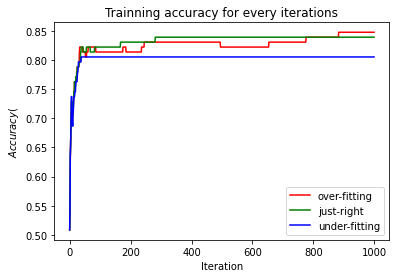

In [169]:
plt.figure()
plt.plot(over_accuracy, c='r', label='over-fitting')
plt.plot(right_accuracy, c='g', label='just-right')
plt.plot(under_accuracy, c='b', label='under-fitting')
plt.xlabel("Iteration")
plt.ylabel("$Accuracy(%)$")
plt.title("Trainning accuracy for every iterations")
plt.legend()

## 5. Display the final training accuracy with varying regularization parameters

* display the final training accuracy obtained with the chosen λ1 for over-fitting in number (%) at convergence (in red color)
* display the final training accuracy obtained with the chosen λ2 for just-right in number (%) at convergence (in green color)
* display the final training accuracy obtained with the chosen λ3 for under-fitting in number (%) at convergence (in blue color)

In [170]:
print(colored(accuracy(over_theta, X, y), 'red'), colored(accuracy(right_theta, X, y), 'green'), colored(accuracy(under_theta, X, y), 'blue'))

0.847457627118644 0.8389830508474576 0.8050847457627118


## 6. Plot the optimal classifier with varying regularization parameters superimposed on the training data

* plot the boundary of the optimal classifier with the chosen λ1 for over-fitting at convergence (in red color)
* plot the boundary of the optimal classifier with the chosen λ2 for just-right at convergence (in green color)
* plot the boundary of the optimal classifier with the chosen λ3 for under-fitting at convergence (in blue color)
* the boundary of the classifier is defined by `{(x,y)∣σ(g(x,y;θ))=0.5}={(x,y)∣g(x,y;θ)=0}`
* the boundaries of the classifiers with different regularization parameters should be presented with the training data points (x,y) with their labels l in colors (blue for label 0 and red for label 1)
* you can use contour function in python3

No handles with labels found to put in legend.


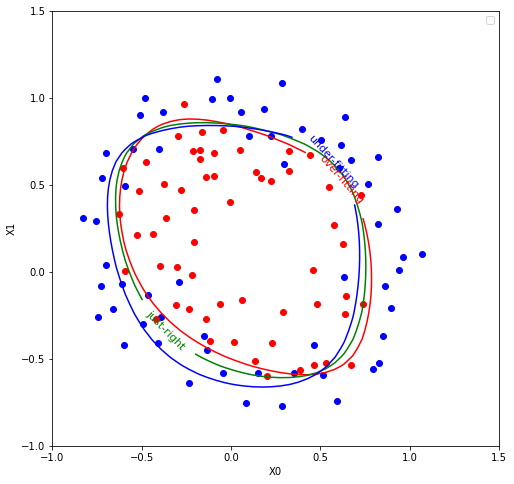

In [171]:
def mapFeaturePlot(x1,x2,degree):
    out = np.ones(1)
    for i in range(1,degree+1):
        for j in range(i+1):
            terms= (x1**(i-j) * x2**j)
            out= np.hstack((out,terms))
    return out

plt.figure(figsize=(8, 8))
plt.scatter(X0[label==0], X1[label==0], c='b')
plt.scatter(X0[label==1], X1[label==1] , c='r')
# Plotting decision boundary
u_vals = np.linspace(-1,1.5,50)
v_vals= np.linspace(-1,1.5,50)

z=np.zeros((len(u_vals),len(v_vals)))
# over-fitting
for i in range(len(u_vals)):
    for j in range(len(v_vals)):
        z[i,j] =mapFeaturePlot(u_vals[i],v_vals[j],9) @ over_theta
CS = plt.contour(u_vals,v_vals,z.T,0, colors='r')
plt.clabel(CS, CS.levels, inline=True, fmt='over-fitting', fontsize=11)

# just-right
for i in range(len(u_vals)):
    for j in range(len(v_vals)):
        z[i,j] =mapFeaturePlot(u_vals[i],v_vals[j],9) @ right_theta
CS = plt.contour(u_vals,v_vals,z.T,0, colors='g')
plt.clabel(CS, CS.levels, inline=True, fmt='just-right', fontsize=11)

# under-fitting
for i in range(len(u_vals)):
    for j in range(len(v_vals)):
        z[i,j] =mapFeaturePlot(u_vals[i],v_vals[j],9) @ under_theta
CS = plt.contour(u_vals,v_vals,z.T,0, colors='b')
plt.clabel(CS, CS.levels, inline=True, fmt='under-fitting', fontsize=11)

plt.xlabel("X0")
plt.ylabel("X1")
plt.legend()